# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
import os
fater_path = os.path.abspath('..')
print(fater_path)
os.chdir(fater_path)

/home/mark/Documents/PythonProject/ShuffleNet-Retrain/ShuffleNetV2+


In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

## 导入工具包

In [4]:
import pandas as pd
import numpy as np

## 载入类别名称和ID easy

In [7]:
dataset_name = 'test_easy_classes'
model_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/'
model_name = 'retrain_COME15K_checkpoint-best-avg-0.544-Medium.pth.tar'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入类别名称和ID hard

In [53]:
dataset_name = 'test_hard_classes'
model_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/'
model_name = 'retrain_COME15K_checkpoint-best-avg-0.544-Medium.pth.tar'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集预测结果表格

In [54]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [55]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,0,covering,3,mater,True,0.150702,0.021558,0.007851,0.031100,0.740860,0.024640,0.017243,0.006046
1,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,3,mater,1,device,2,domestic_animal,False,0.051497,0.143278,0.090627,0.484257,0.086004,0.015017,0.069500,0.059820
2,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,0,covering,3,mater,True,0.285533,0.023308,0.034161,0.054380,0.533188,0.029523,0.017891,0.022016
3,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,5,plant,0,covering,True,0.111442,0.078068,0.008580,0.065755,0.497820,0.178757,0.039475,0.020102
4,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,3,mater,5,plant,1,device,False,0.061014,0.151636,0.040157,0.296459,0.080052,0.205801,0.085705,0.079177


## 绘制某一类别的ROC曲线

In [56]:
specific_class = 'covering'

In [57]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [58]:
y_test

0        True
1        True
2        True
3        True
4        True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: 标注类别名称, Length: 3000, dtype: bool

In [59]:
# 二分类置信度
y_score = df[specific_class + '-预测置信度']

In [60]:
y_score

0       0.150702
1       0.051497
2       0.285533
3       0.111442
4       0.061014
          ...   
2995    0.125837
2996    0.075381
2997    0.082533
2998    0.028809
2999    0.039720
Name: covering-预测置信度, Length: 3000, dtype: float64

In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

## easy

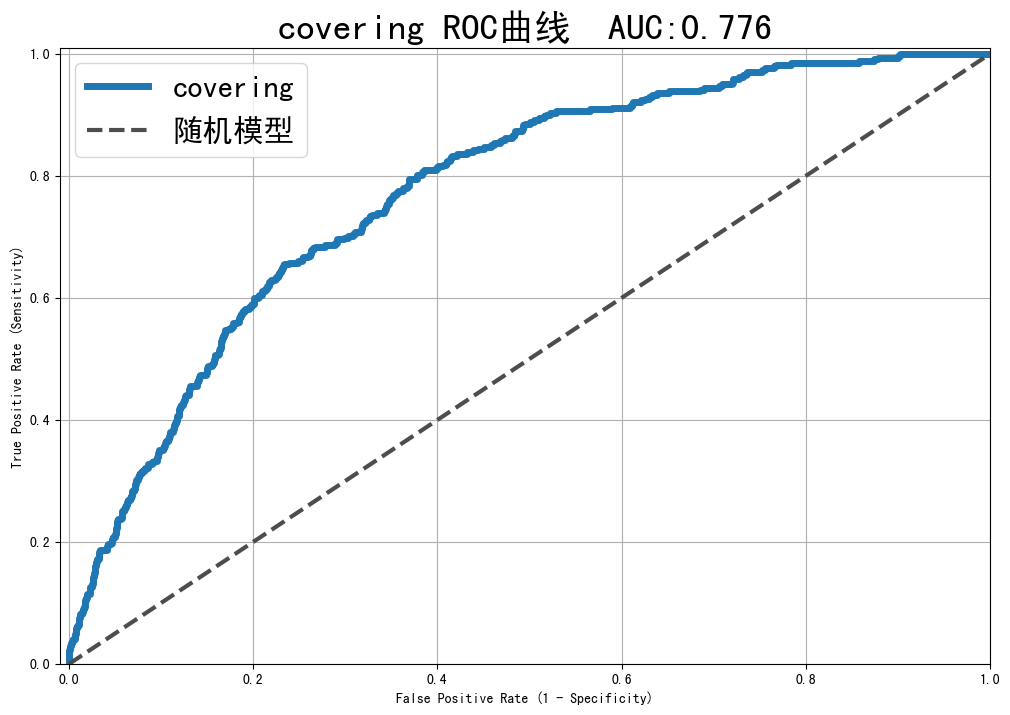

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

## hard

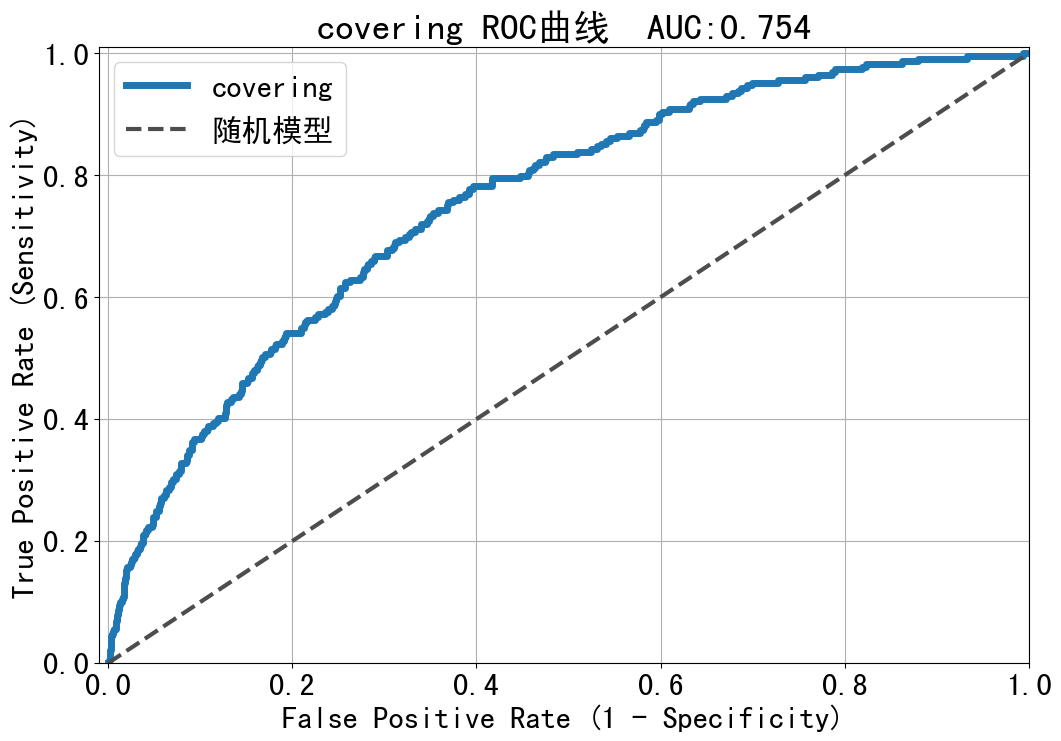

In [62]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [63]:
auc(fpr, tpr)

0.7544073915900649

## 绘制所有类别的ROC曲线

In [64]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [65]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [66]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

## easy

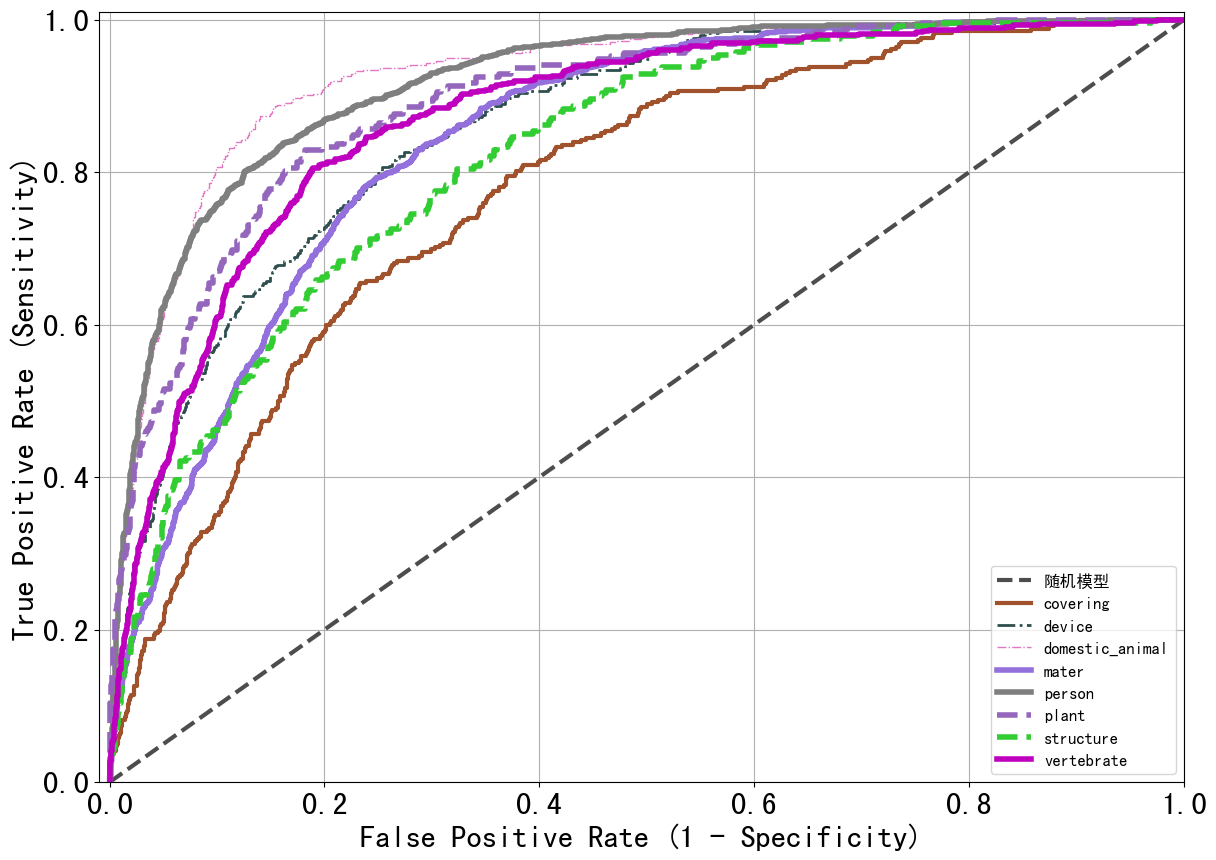

In [22]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## hard

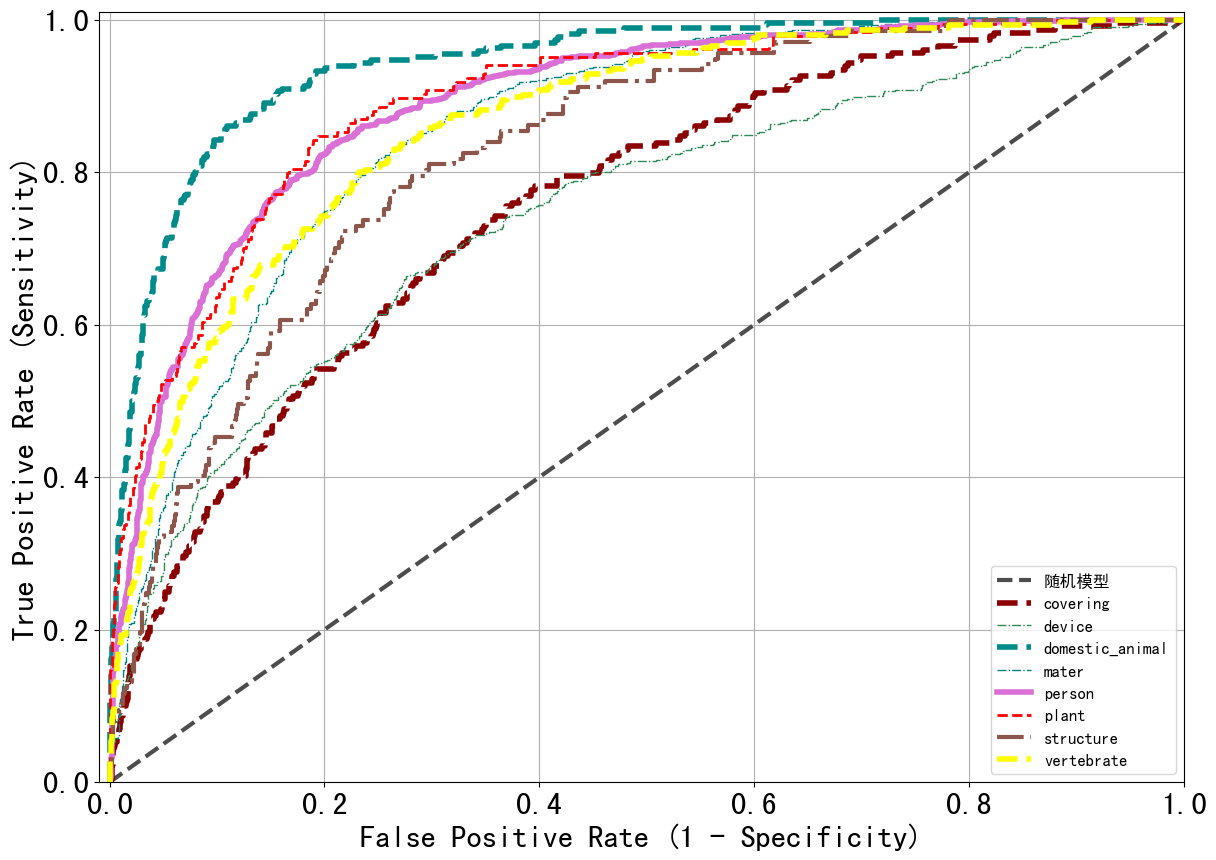

In [67]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [68]:
df_report = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [69]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.000000,0.000000,0.000000,229.0,0.000000,0.218342,0.754407
1,device,0.591837,0.227006,0.328147,511.0,0.227006,0.432488,0.745061
2,domestic_animal,0.575851,0.699248,0.631579,266.0,0.699248,0.664385,0.939731
3,mater,0.449203,0.770940,0.567653,585.0,0.770940,0.565858,0.855729
4,person,0.576792,0.852459,0.688041,793.0,0.852459,0.740349,0.888886
5,plant,0.548387,0.369565,0.441558,184.0,0.369565,0.489737,0.891754
6,structure,0.444444,0.058394,0.103226,137.0,0.058394,0.206303,0.823487
7,vertebrate,0.533742,0.294915,0.379913,295.0,0.294915,0.452303,0.860904
8,macro avg,0.465032,0.409066,0.392515,3000.0,0.409066,0.471221,0.844995
9,weighted avg,0.498344,0.530667,0.473613,3000.0,0.530667,0.539219,0.846603


In [70]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [71]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [72]:
df_report['AUC'] = auc_list

In [73]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.000000,0.000000,0.000000,229.0,0.000000,0.218342,0.754407
1,device,0.591837,0.227006,0.328147,511.0,0.227006,0.432488,0.745061
2,domestic_animal,0.575851,0.699248,0.631579,266.0,0.699248,0.664385,0.939731
3,mater,0.449203,0.770940,0.567653,585.0,0.770940,0.565858,0.855729
4,person,0.576792,0.852459,0.688041,793.0,0.852459,0.740349,0.888886
5,plant,0.548387,0.369565,0.441558,184.0,0.369565,0.489737,0.891754
6,structure,0.444444,0.058394,0.103226,137.0,0.058394,0.206303,0.823487
7,vertebrate,0.533742,0.294915,0.379913,295.0,0.294915,0.452303,0.860904
8,macro avg,0.465032,0.409066,0.392515,3000.0,0.409066,0.471221,0.844995
9,weighted avg,0.498344,0.530667,0.473613,3000.0,0.530667,0.539219,0.846603


In [74]:
df_report.to_csv(model_path + dataset_name + '-各类别准确率评估指标.csv', index=False)